In [1]:
import uproot
import numpy as np 
import os 
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [18]:
# d = "/eos/cms/store/group/phys_higgs/resonant_HH/RunII/MicroAOD/HHWWggSignal/Phase_II/Private_WJets_14TeV_EMFilter/W1Jets_14TeV/RunIISummer20UL17_MiniAOD/210923_065533/0000/" # W1Jets
# d = "/eos/cms/store/group/phys_higgs/resonant_HH/RunII/MicroAOD/HHWWggSignal/Phase_II/Private_WJets_14TeV_EMFilter/W2Jets_14TeV/RunIISummer20UL17_MiniAOD/210923_065640/0000/" # W2Jets
d = "/eos/cms/store/group/phys_higgs/resonant_HH/RunII/MicroAOD/HHWWggSignal/Phase_II/Private_WJets_14TeV_EMFilter/W3Jets_14TeV/RunIISummer20UL17_MiniAOD/210923_065709/0000/" # W3Jets

In [19]:
files = ["%s/%s"%(d, f) for f in os.listdir(d)]

In [20]:
len(files)

500

In [21]:
nEvents = 0
for f_i, f in enumerate(files):
    if(f_i%50 == 0):
        print("On file:",f_i)
    u_f = uproot.open(f)
    N = len(u_f["Events"]["recoVertexCompositePtrCandidates_slimmedSecondaryVertices__PAT.present"].array())
    nEvents += N

print("nEvents:",nEvents)
    

On file: 0
On file: 50
On file: 100
On file: 150
On file: 200
On file: 250
On file: 300
On file: 350
On file: 400
On file: 450
nEvents: 39563


In [ ]:
# W1Jets: 28292 / 20 000 000  
# W2Jets: 43992 / 20 000 000 
# W3Jets: 39563 / 20 000 000 

In [23]:
vals = [28292, 43992, 39563]
for v in vals:
    print(v / 20000000.)

0.0014146
0.0021996
0.00197815


In [ ]:
# filter: 1000


dipho_presel_efficiencies: [1.85e-06, 2.35e-06, 2.4e-06]


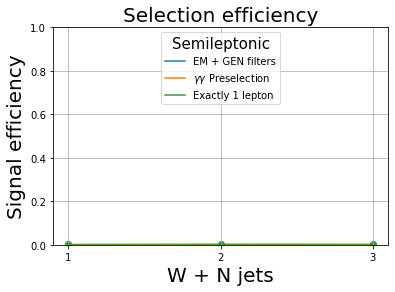

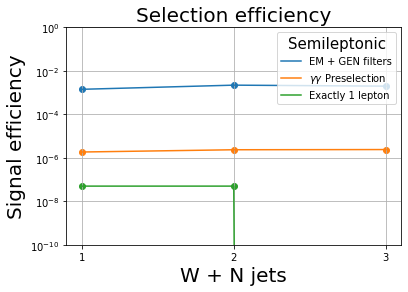

N events to request for 5000 events after requiring a good lepton:
W1Jets: 100000000000.0


In [17]:
# Plot efficiencies 
logs = [0, 1]
xpoints = [1, 2, 3]
filter_N_events = [28292, 43992, 39563]
presel_N_events = [(36 + 1), (46 + 1), (48 + 0)]
lep_N_events = [1, 1, 0] # 1 / 37, 1 / 47, 0 / 48 
filterEfficiencies = [N / 20000000. for N in filter_N_events]
dipho_presel_efficiencies = [N / 20000000. for N in presel_N_events]
onelep_efficiencies = [N / 20000000. for N in lep_N_events]
print("dipho_presel_efficiencies:",dipho_presel_efficiencies)
for log in logs:
    fig, ax = plt.subplots()
    
    # filter efficiencies 
    plt.scatter(x = xpoints, y = filterEfficiencies)
    plt.plot(xpoints, filterEfficiencies, label = "EM + GEN filters")
    
    # Diphoton preselections 
    plt.scatter(x = xpoints, y = dipho_presel_efficiencies)
    plt.plot(xpoints, dipho_presel_efficiencies, label = r'$\gamma\gamma$ Preselection')

    # Exactly one lepton 
    plt.scatter(x = xpoints, y = onelep_efficiencies)
    plt.plot(xpoints, onelep_efficiencies, label = r'Exactly 1 lepton')

    # Decorate plot 
    plt.title("Selection efficiency", fontsize = 20)
    plt.xlabel("W + N jets", fontsize = 20)
    plt.ylabel("Signal efficiency", fontsize = 20)
    plt.grid()

    if(log):
        plt.yscale("log")
        plt.ylim(0.0000000001, 1)
        legend = plt.legend(loc = 'upper right', title = "Semileptonic")
    else:
        plt.ylim(0, 1)
        legend = plt.legend(loc = 'upper center', title = "Semileptonic")

    ax.xaxis.get_major_locator().set_params(integer=True)
        
#     thisax = plt.figure().gca()
#     thisax.xaxis.set_major_locator(MaxNLocator(integer=True))         
        
    plt.setp(legend.get_title(),fontsize=15)

    plt.show()
    plt.close()
    
print("N events to request for 5000 events after requiring a good lepton:")
print("W1Jets:",(5000. / (1 / 20000000)))